# Modeling Goals
- The aim of the competition is a plain `accuracy_score` for unlabeled data.
- From a financial perspective, the allocation of maintenance resources is vital, therefore correctly labeling the pumps which are *functional needs repair* and *non functional* can be considered the most important.

**NOTE:** *This notebook is a continuation of the `1_processing` notebook from the same directory of this repo.*

In [1]:
from support_functions import *

pd.set_option('display.max_columns', None)
%matplotlib inline
plt.style.use(['ggplot', 'seaborn-talk'])

np.random.seed(RANDOM_STATE)

### GRID_SEARCH
**The variable below, `RUN_GRIDSEARCH` is used in this notebook as a decision to run the sklearn `GridSearchCV` with given parameters. A model param/metrics dataframe will then be dumped into the directory to replace the current df.**

**This process is computationally expensive and takes a very long time. With `RUN_GRIDSEARCH` set to False, a GridSearch will not be run, but rather the found optimizations will be fitted and shown graphically.**

In [2]:
RUN_GRIDSEARCH = False

## Reload Data
Reload from processing notebook.

In [3]:
os.listdir('processed_data/')

['.ipynb_checkpoints',
 'cat_feature_names.jobjib',
 'num_feature_names.jobjib',
 'unlabeled_y_df.csv',
 'X_test_df.csv',
 'X_train_df.csv',
 'y_test_enc.csv',
 'y_train_enc.csv']

In [4]:
label_enc = load('dumps/label_enc.jobjib')
LABEL_NAMES = label_enc.classes_
LABEL_NAMES

array(['functional', 'functional needs repair', 'non functional'],
      dtype=object)

In [5]:
PIPELINE = load('dumps/preprocessing.jobjib')
PIPELINE

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['amount_tsh', 'gps_height', 'longitude',
                                  'latitude', 'num_private', 'population',
                                  'years_old', 'tsh_exists', 'installed_by_DWE',
                                  'basin_Ruvuma / Southern Coast',
                                  'subvillage_Majengo', 'subvillage_Shuleni',
                                  'subvillage_Madukani', 'su...
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encod

In [7]:
# For comclusion and recommendations.
X_original = pd.read_csv('./data/train_values.csv')
y_original = pd.read_csv('./data/train_labels.csv')['status_group']

# For modeling.
X_train = pd.read_csv('processed_data/X_train_df.csv', index_col=0)
X_test = pd.read_csv('processed_data/X_test_df.csv', index_col=0)
y_train = pd.read_csv('processed_data/y_train_enc.csv', 
                      index_col=0)['status_group']
y_test = pd.read_csv('processed_data/y_test_enc.csv', 
                     index_col=0)['status_group']

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44550, 137), (14850, 137), (44550,), (14850,))

In [8]:
REAL_TEST = pd.read_csv('processed_data/unlabeled_y_df.csv', index_col=0)
REAL_TEST.set_index('id', drop=True, inplace=True)
print(REAL_TEST.shape)
REAL_TEST.head()

(14850, 137)


,amount_tsh,gps_height,longitude,latitude,num_private,population,years_old,tsh_exists,installed_by_DWE,basin_Ruvuma / Southern Coast,subvillage_Majengo,subvillage_Shuleni,subvillage_Madukani,subvillage_Mtakuja,subvillage_Kati,region_Iringa,region_Arusha,region_Tabora,region_Tanga,region_code_10,region_code_15,district_code_4,district_code_3,lga_Bariadi,lga_Siha,lga_Kigoma Rural,lga_Bagamoyo,lga_Pangani,lga_Babati,lga_Lindi Rural,lga_Kasulu,lga_Bunda,funder_Government Of Tanzania,funder_Fini Water,funder_Ministry Of Water,funder_Private Individual,funder_Germany Republi,funder_rare,funder_World Bank,funder_Norad,funder_Hesawa,funder_Lga,funder_Rc Church,funder_Isf,funder_Dwsp,funder_Tcrs,funder_Amref,funder_Dwe,funder_District Council,funder_Adb,funder_Private,funder_Netherlands,funder_Wateraid,funder_Mission,funder_Hifab,funder_Water,funder_Rudep,public_meeting_True,public_meeting_missing,scheme_management_Other,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_WUA,scheme_management_Water Board,scheme_management_Water authority,scheme_management_missing,permit_False,permit_missing,extraction_type_group_afridev,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_india mark iii,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_other,extraction_type_group_other handpump,extraction_type_group_other motorpump,extraction_type_group_rope pump,extraction_type_group_submersible,extraction_type_group_swn 80,extraction_type_group_wind-powered,management_company,management_private operator,management_unknown,management_vwc,management_water authority,management_water board,management_wug,management_group_commercial,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_type_annually,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,altitude_cat_med_altitude
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50785,-0.131809,1.917381,0.186597,0.556538,-0.052648,0.296047,-0.439584,-0.651262,-0.644278,-0.284459,-0.093367,-0.093976,-0.091763,-0.066646,-0.081784,-0.312521,-0.245016,-0.184202,-0.213146,-0.216121,-0.17772,-0.419918,2.223324,-0.14179,-0.085459,-0.118118,-0.131299,-0.07421,-0.092259,-0.08024,-0.133841,-0.083709,-0.426039,-0.079672,-0.09999,-0.119575,-0.101693,1.328993,-0.154071,-0.113337,-0.197715,-0.085725,-0.075273,-0.072665,-0.11595,-0.102031,-0.084521,-0.090637,-0.11841,-0.088858,-0.071406,-0.090385,-0.075724,-0.071088,-0.087696,-0.098723,-0.073442,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
51630,-0.131809,1.301208,0.394140,0.811457,-0.052648,0.252012,0.343914,-0.651262,1.552125,-0.284459,-0.093367,-0.093976,-0.091763,-0.066646

# Modeling
In this notebook, we will be using a dummy-classifier and three predictive models.
- Random Forest Classifier
- LinearSVC
- XGBoost Classifier

## Baseline - Dummy Classifier

In [9]:
# Set up baseline dummy-classifier which predicts 
# randomly based on the class distribution.
dummy_clf = DummyClassifier(random_state=RANDOM_STATE,
                            strategy='stratified')
dummy_clf.fit(X_train, y_train)

DummyClassifier(random_state=51, strategy='stratified')

********************************************************************************
*                    Dummy Classifier Classification Report                    *
********************************************************************************
                         precision    recall  f1-score   support

             functional       0.54      0.55      0.55      8065
functional needs repair       0.07      0.07      0.07      1079
         non functional       0.39      0.39      0.39      5706

               accuracy                           0.45     14850
              macro avg       0.34      0.34      0.34     14850
           weighted avg       0.45      0.45      0.45     14850



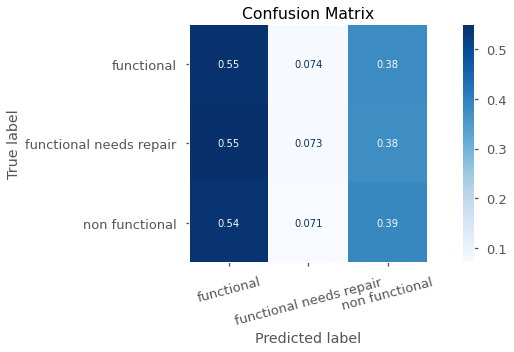

In [10]:
show_metrics(dummy_clf, X_test, y_test, 
             label='Dummy Classifier',
             target_names=LABEL_NAMES)

## Random Forest Classifier

### Vanilla Model

,Label,Timestamp,Elapsed Time (sec)
0,Start,2021-02-20 10:38:39.768764,0.000000
1,Stop,2021-02-20 10:38:52.639487,12.870723


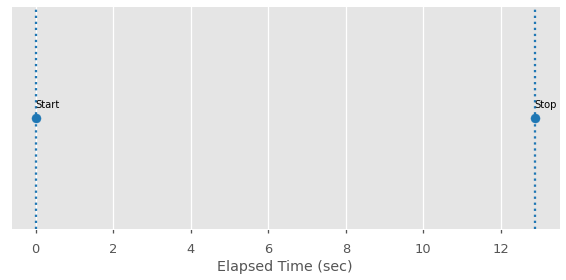

In [11]:
watch = Stopwatch()

# Starting with no parameter-tuning.
forest = RandomForestClassifier(random_state=RANDOM_STATE)
forest.fit(X_train, y_train)

watch.stop()
watch.display_laps()

********************************************************************************
*            Vanilla Random Forest Classifier Classification Report            *
********************************************************************************
                         precision    recall  f1-score   support

             functional       0.81      0.88      0.85      8065
functional needs repair       0.54      0.36      0.43      1079
         non functional       0.84      0.78      0.81      5706

               accuracy                           0.81     14850
              macro avg       0.73      0.68      0.70     14850
           weighted avg       0.80      0.81      0.80     14850



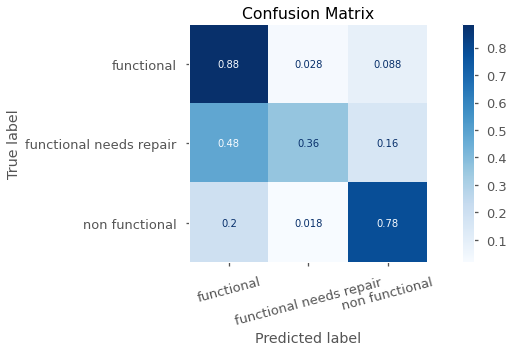

In [12]:
show_metrics(forest, X_test, y_test, 
             label='Vanilla Random Forest Classifier',
             target_names=LABEL_NAMES)

Having a vanilla Random Forest score `0.81` accuracy is pretty impressive. I feel that this might be a great model-type for this problem because of the number of categorical features and the robust-quality of a Forest. 

In [13]:
# Set up feature-importance df to plot.
feat_imp_dct = dict(
    feature = X_train.columns,
    importance = forest.feature_importances_
)
feat_imp = pd.DataFrame(feat_imp_dct)

feat_imp.sort_values('importance', ascending=False, inplace=True)
feat_imp.head(10)

,feature,importance
3,latitude,0.140303
2,longitude,0.139093
1,gps_height,0.068136
109,quantity_dry,0.065532
6,years_old,0.053381
5,population,0.047908
110,quantity_enough,0.027152
75,extraction_type_group_other,0.021286
130,waterpoint_type_other,0.021264
0,amount_tsh,0.020447


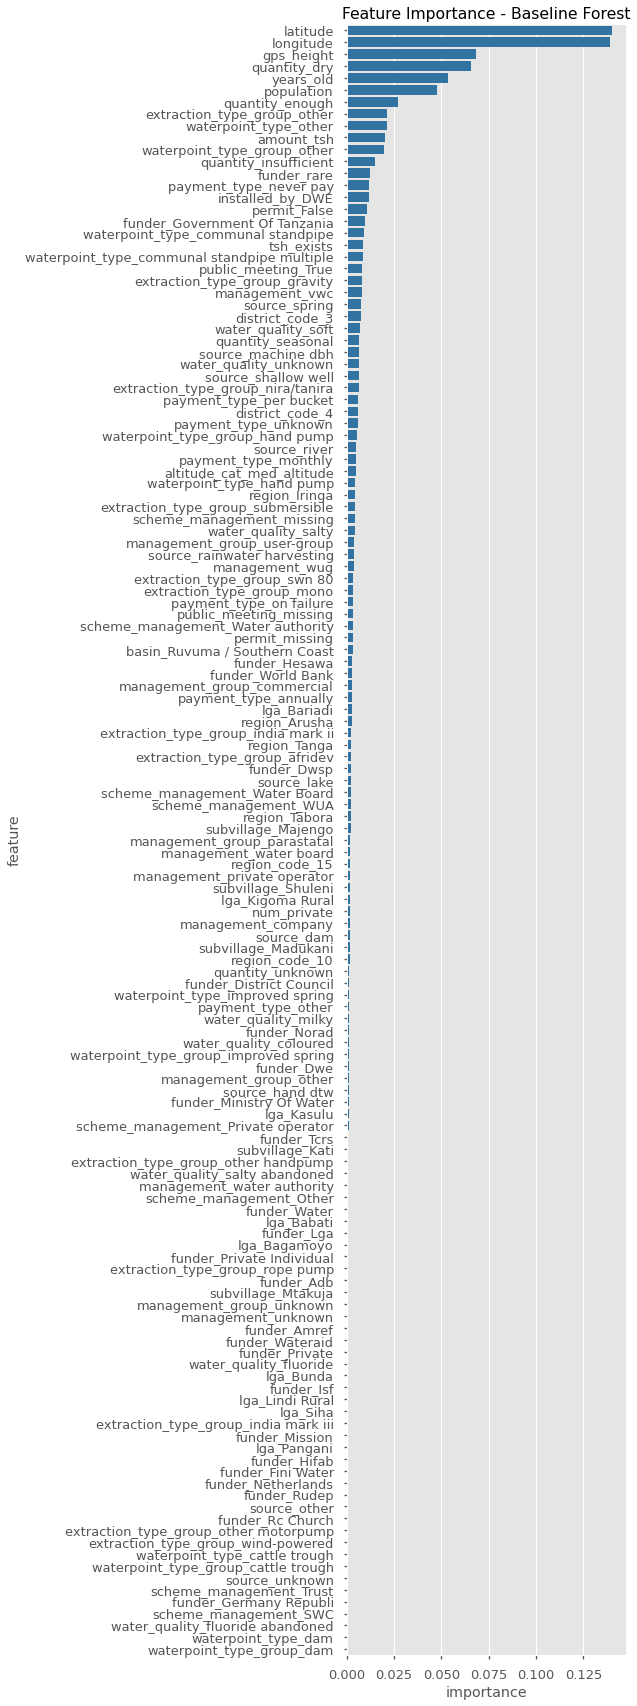

In [14]:
# Plot feature importances from vanilla model.
fig, ax = plt.subplots(figsize=(5,30))
sns.barplot(x='importance', y='feature', data=feat_imp, orient='h',
            color=COLOR, ax=ax)
ax.set(title='Feature Importance - Baseline Forest');

Interestingly, some of the top features are *locational* (`longitude` / `latitude` / `gps_height`).

### Forest GridSearch
For each model type, we will try to tune some parameters to optimize for different metrics.

In [15]:
FOREST_FNAME = 'forest_df.jobjib'

********************************************************************************
*                      RFC-accuracy Classification Report                      *
********************************************************************************
                         precision    recall  f1-score   support

             functional       0.79      0.92      0.85      8065
functional needs repair       0.67      0.25      0.37      1079
         non functional       0.86      0.75      0.80      5706

               accuracy                           0.81     14850
              macro avg       0.77      0.64      0.67     14850
           weighted avg       0.81      0.81      0.80     14850



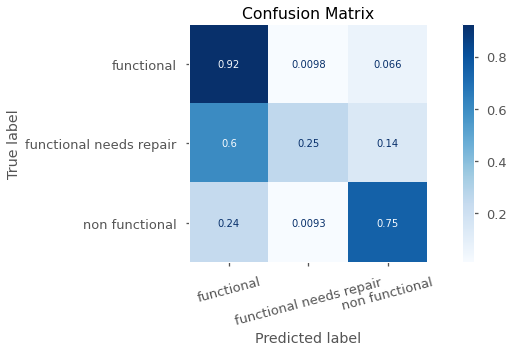

********************************************************************************
*                      RFC-f1_macro Classification Report                      *
********************************************************************************
                         precision    recall  f1-score   support

             functional       0.81      0.88      0.85      8065
functional needs repair       0.53      0.35      0.42      1079
         non functional       0.84      0.78      0.81      5706

               accuracy                           0.81     14850
              macro avg       0.73      0.67      0.69     14850
           weighted avg       0.80      0.81      0.80     14850



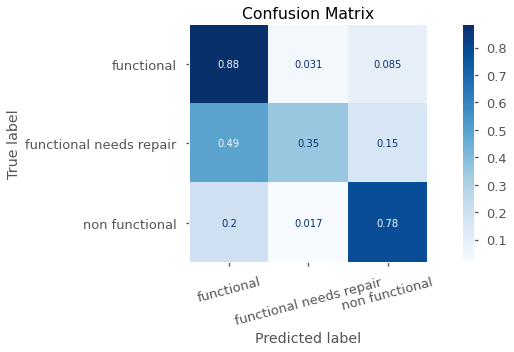

********************************************************************************
*                  RFC-precision_macro Classification Report                   *
********************************************************************************
                         precision    recall  f1-score   support

             functional       0.76      0.94      0.84      8065
functional needs repair       0.71      0.18      0.29      1079
         non functional       0.87      0.70      0.78      5706

               accuracy                           0.79     14850
              macro avg       0.78      0.61      0.63     14850
           weighted avg       0.80      0.79      0.78     14850



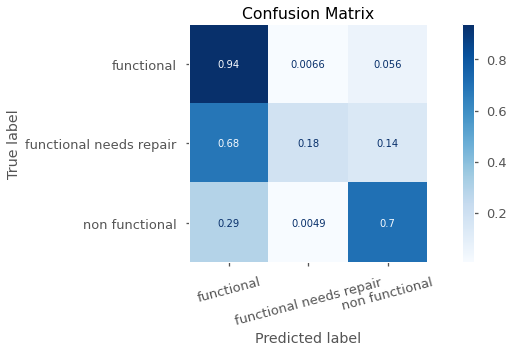

********************************************************************************
*                    RFC-recall_macro Classification Report                    *
********************************************************************************
                         precision    recall  f1-score   support

             functional       0.81      0.88      0.84      8065
functional needs repair       0.53      0.35      0.42      1079
         non functional       0.84      0.78      0.81      5706

               accuracy                           0.81     14850
              macro avg       0.72      0.67      0.69     14850
           weighted avg       0.80      0.81      0.80     14850



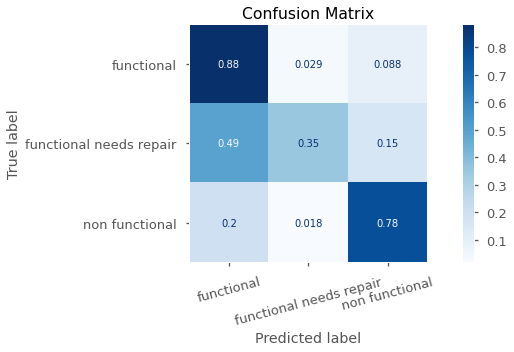

,Label,Timestamp,Elapsed Time (sec)
0,Start,2021-02-20 10:38:58.095337,0.000000
1,RFC-accuracy,2021-02-20 10:39:14.154274,16.058937
2,RFC-f1_macro,2021-02-20 10:39:29.408557,31.313220
3,RFC-precision_macro,2021-02-20 10:39:40.520465,42.425128
4,RFC-recall_macro,2021-02-20 10:39:55.468579,57.373242


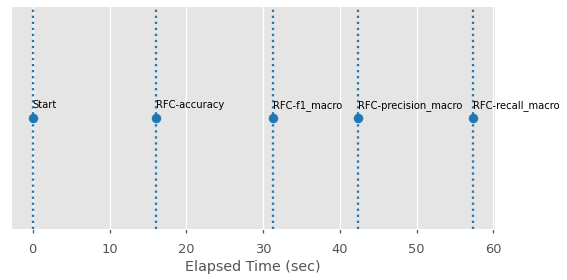

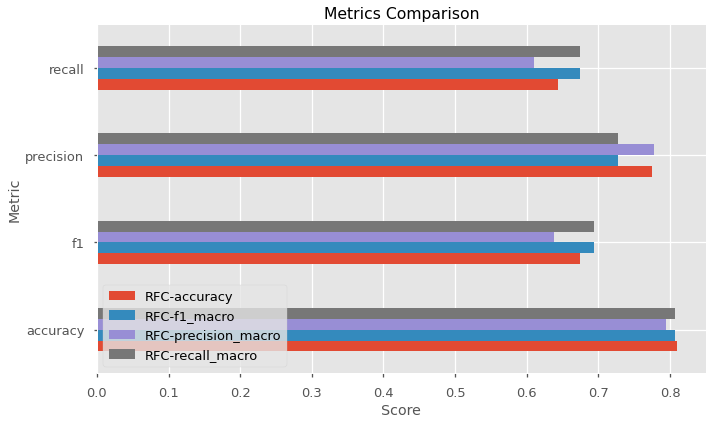

,model_label,best_params,accuracy,f1,precision,recall
0,RFC-accuracy,"{'bootstrap': False, 'criterion': 'gini', 'min...",0.809226,0.674151,0.774674,0.643333
1,RFC-f1_macro,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.807003,0.693925,0.727262,0.674195
2,RFC-precision_macro,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.793939,0.638310,0.778300,0.610401
3,RFC-recall_macro,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.807003,0.693925,0.727262,0.674195


In [16]:
# SEE NOTE ON `RUN_GRIDSEARCH`.
if RUN_GRIDSEARCH:
    forest_params = {
        'criterion': ['gini', 'entropy'],
        'min_samples_leaf': [1, 3, 5],
        'bootstrap': [True, False]
    }
    
    forest_df = gridsearch_model(RandomForestClassifier,
                                 'RFC',
                                 forest_params,
                                 X_train, X_test, y_train, y_test, 
                                 target_names=LABEL_NAMES,
                                 scoring_metrics=['accuracy', 'f1', 
                                                  'precision', 'recall'],
                                 multiclass_default_average='macro')
    
    dump(forest_df, f'models/{FOREST_FNAME}')
    
# Else, load in data.
elif FOREST_FNAME in os.listdir('models/'):
    forest_df = load(f'models/{FOREST_FNAME}')
    show_metrics_for_df(forest_df,
                        RandomForestClassifier,
                        X_train,
                        X_test,
                        y_train,
                        y_test,
                        target_names=LABEL_NAMES)
    
plot_comparisons(forest_df)
forest_df

The model optimized for accuracy is very good with a 0.809 `accuracy`, however it leaves some to be desired with its low `recall_macro`.
> Recall with a **macro-weight** is a harsher metric than "weighted" because it finds a balance between the categories equally, rather than making it more important to correctly identify the more-common categories.

## K-Nearest Neighbors (KNN)

### Vanilla Model

,Label,Timestamp,Elapsed Time (sec)
0,Start,2021-02-20 10:39:55.823216,0.000000
1,Stop,2021-02-20 10:39:55.841221,0.018005


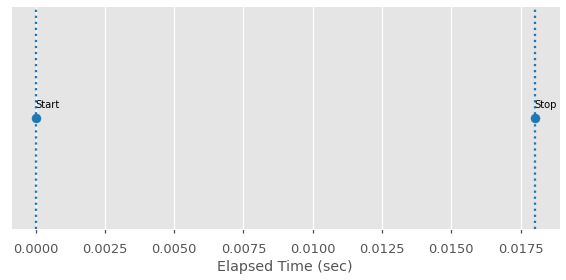

In [17]:
watch = Stopwatch()

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

watch.stop()
watch.display_laps()

********************************************************************************
*                     KNN Classifier Classification Report                     *
********************************************************************************
                         precision    recall  f1-score   support

             functional       0.77      0.86      0.81      8065
functional needs repair       0.48      0.31      0.37      1079
         non functional       0.80      0.71      0.75      5706

               accuracy                           0.77     14850
              macro avg       0.68      0.63      0.65     14850
           weighted avg       0.76      0.77      0.76     14850



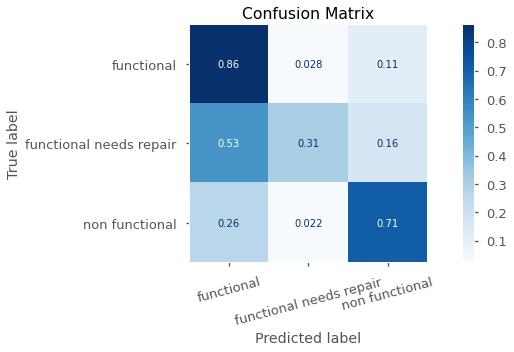

In [18]:
show_metrics(knn, X_test, y_test, 
             label='KNN Classifier',
             target_names=LABEL_NAMES)

### KNN GridSearch

In [19]:
KNN_FNAME = 'knn_df.jobjib'

********************************************************************************
*                      KNN-accuracy Classification Report                      *
********************************************************************************
                         precision    recall  f1-score   support

             functional       0.78      0.85      0.81      8065
functional needs repair       0.46      0.31      0.37      1079
         non functional       0.79      0.73      0.76      5706

               accuracy                           0.76     14850
              macro avg       0.67      0.63      0.65     14850
           weighted avg       0.76      0.76      0.76     14850



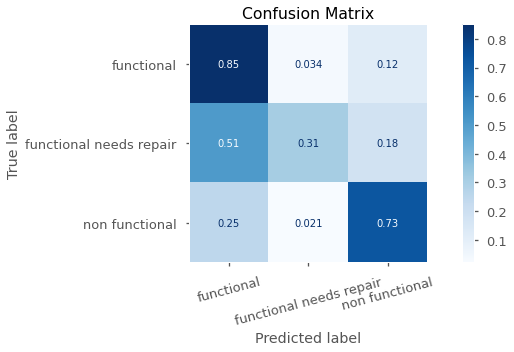

********************************************************************************
*                      KNN-f1_macro Classification Report                      *
********************************************************************************
                         precision    recall  f1-score   support

             functional       0.78      0.85      0.81      8065
functional needs repair       0.46      0.31      0.37      1079
         non functional       0.79      0.73      0.76      5706

               accuracy                           0.76     14850
              macro avg       0.67      0.63      0.65     14850
           weighted avg       0.76      0.76      0.76     14850



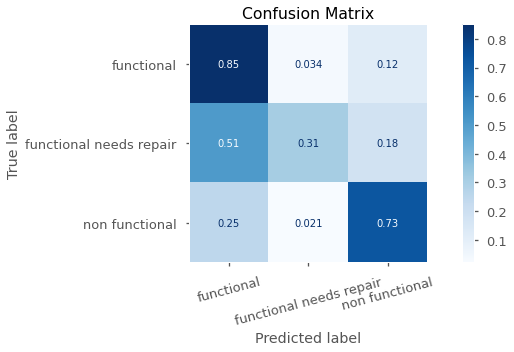

********************************************************************************
*                  KNN-precision_macro Classification Report                   *
********************************************************************************
                         precision    recall  f1-score   support

             functional       0.75      0.86      0.81      8065
functional needs repair       0.55      0.27      0.36      1079
         non functional       0.78      0.69      0.73      5706

               accuracy                           0.75     14850
              macro avg       0.69      0.61      0.63     14850
           weighted avg       0.75      0.75      0.74     14850



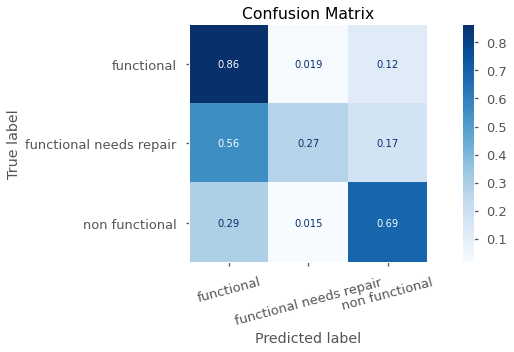

********************************************************************************
*                    KNN-recall_macro Classification Report                    *
********************************************************************************
                         precision    recall  f1-score   support

             functional       0.78      0.85      0.81      8065
functional needs repair       0.46      0.31      0.37      1079
         non functional       0.79      0.73      0.76      5706

               accuracy                           0.76     14850
              macro avg       0.67      0.63      0.65     14850
           weighted avg       0.76      0.76      0.76     14850



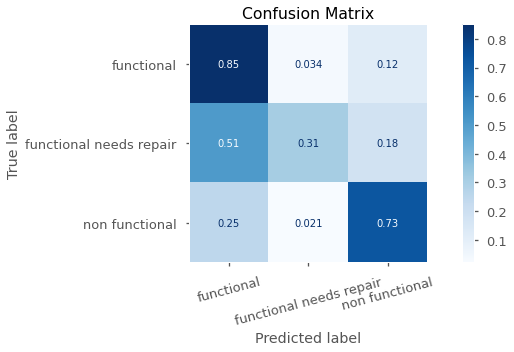

,Label,Timestamp,Elapsed Time (sec)
0,Start,2021-02-20 10:40:35.277528,0.000000
1,KNN-accuracy,2021-02-20 10:41:13.505252,38.227724
2,KNN-f1_macro,2021-02-20 10:41:42.542397,67.264869
3,KNN-precision_macro,2021-02-20 10:42:19.661731,104.384203
4,KNN-recall_macro,2021-02-20 10:42:48.440507,133.162979


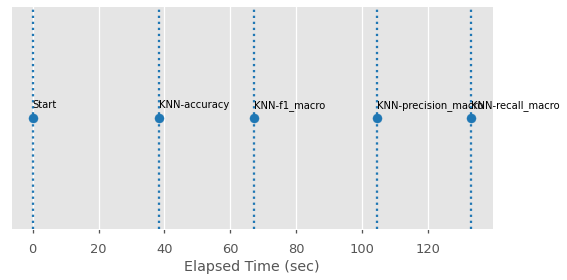

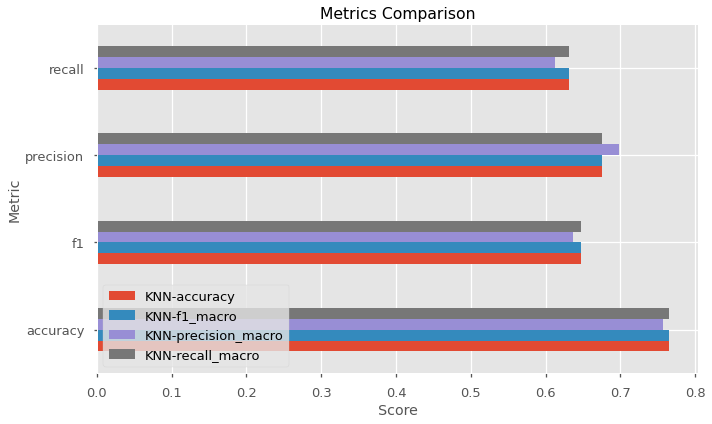

,model_label,best_params,accuracy,f1,precision,recall
0,KNN-accuracy,{'n_neighbors': 3},0.765589,0.647659,0.675512,0.631222
1,KNN-f1_macro,{'n_neighbors': 3},0.765589,0.647659,0.675512,0.631222
2,KNN-precision_macro,{'n_neighbors': 9},0.756566,0.637257,0.697740,0.612245
3,KNN-recall_macro,{'n_neighbors': 3},0.765589,0.647659,0.675512,0.631222


In [20]:
if RUN_GRIDSEARCH:
    knn_params = {
        'n_neighbors': [3, 5, 7, 9]
    }

    knn_df = gridsearch_model(KNeighborsClassifier,
                              'KNN',
                              knn_params,
                              X_train, X_test, y_train, y_test, 
                              target_names=LABEL_NAMES,
                              scoring_metrics=['accuracy', 'f1', 
                                               'precision', 'recall'],
                              multiclass_default_average='macro')
    
    dump(knn_df, f'models/{KNN_FNAME}')
    
elif KNN_FNAME in os.listdir('models/'):
    knn_df = load(f'models/{KNN_FNAME}')
    show_metrics_for_df(knn_df,
                        KNeighborsClassifier,
                        X_train,
                        X_test,
                        y_train,
                        y_test,
                        target_names=LABEL_NAMES)
    
plot_comparisons(knn_df)
knn_df

These models aren't showing as much accuracy as the Random Forests, nor do they seem to be better at finding the minority class `functional needs repair`.

## XGBoost

### Vanilla Model

,Label,Timestamp,Elapsed Time (sec)
0,Start,2021-02-20 10:42:48.799471,0.000000
1,Stop,2021-02-20 10:43:26.524513,37.725042


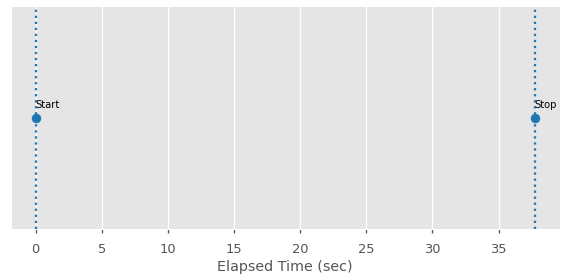

In [21]:
watch = Stopwatch()

xgb = XGBClassifier(random_state=RANDOM_STATE)
xgb.fit(X_train, y_train)

watch.stop()
watch.display_laps()

********************************************************************************
*                 Vanilla XGBClassifier Classification Report                  *
********************************************************************************
                         precision    recall  f1-score   support

             functional       0.72      0.93      0.81      8065
functional needs repair       0.61      0.12      0.21      1079
         non functional       0.84      0.61      0.71      5706

               accuracy                           0.75     14850
              macro avg       0.72      0.55      0.57     14850
           weighted avg       0.76      0.75      0.73     14850



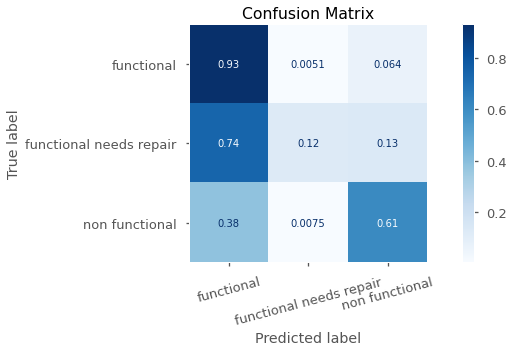

In [22]:
show_metrics(xgb, X_test, y_test, 
             label='Vanilla XGBClassifier',
             target_names=LABEL_NAMES)

### XGB GridSearch

In [23]:
XGB_FNAME = 'xgb_df.jobjib'

********************************************************************************
*                      xgb-accuracy Classification Report                      *
********************************************************************************
                         precision    recall  f1-score   support

             functional       0.77      0.92      0.84      8065
functional needs repair       0.67      0.22      0.34      1079
         non functional       0.86      0.73      0.79      5706

               accuracy                           0.80     14850
              macro avg       0.77      0.63      0.66     14850
           weighted avg       0.80      0.80      0.79     14850



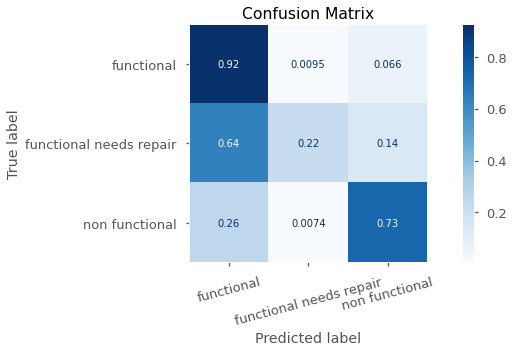

********************************************************************************
*                      xgb-f1_macro Classification Report                      *
********************************************************************************
                         precision    recall  f1-score   support

             functional       0.77      0.92      0.84      8065
functional needs repair       0.67      0.22      0.34      1079
         non functional       0.86      0.73      0.79      5706

               accuracy                           0.80     14850
              macro avg       0.77      0.63      0.66     14850
           weighted avg       0.80      0.80      0.79     14850



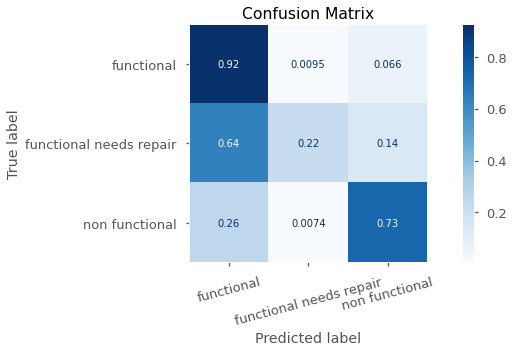

********************************************************************************
*                  xgb-precision_macro Classification Report                   *
********************************************************************************
                         precision    recall  f1-score   support

             functional       0.77      0.92      0.84      8065
functional needs repair       0.67      0.22      0.34      1079
         non functional       0.86      0.73      0.79      5706

               accuracy                           0.80     14850
              macro avg       0.77      0.63      0.66     14850
           weighted avg       0.80      0.80      0.79     14850



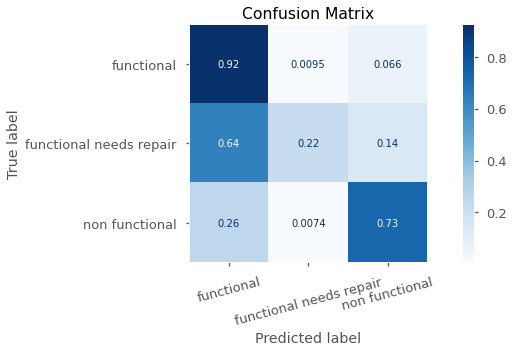

********************************************************************************
*                    xgb-recall_macro Classification Report                    *
********************************************************************************
                         precision    recall  f1-score   support

             functional       0.77      0.92      0.84      8065
functional needs repair       0.67      0.22      0.34      1079
         non functional       0.86      0.73      0.79      5706

               accuracy                           0.80     14850
              macro avg       0.77      0.63      0.66     14850
           weighted avg       0.80      0.80      0.79     14850



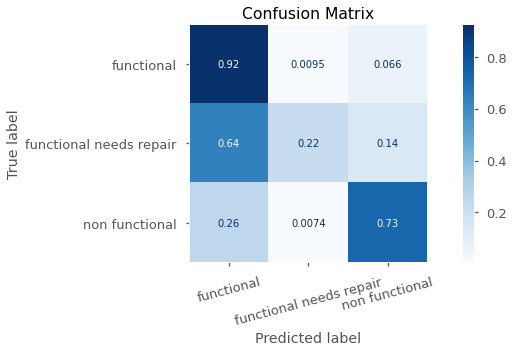

,Label,Timestamp,Elapsed Time (sec)
0,Start,2021-02-20 10:43:27.221152,0.000000
1,xgb-accuracy,2021-02-20 10:45:14.993224,107.772072
2,xgb-f1_macro,2021-02-20 10:46:59.675420,212.454268
3,xgb-precision_macro,2021-02-20 10:48:40.713308,313.492156
4,xgb-recall_macro,2021-02-20 10:50:25.475188,418.254036


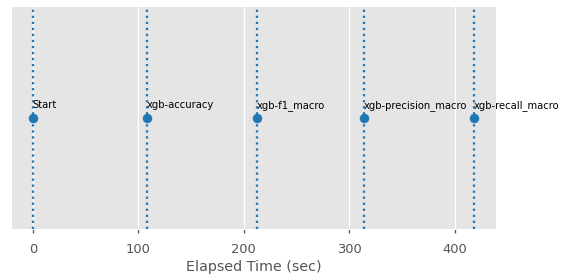

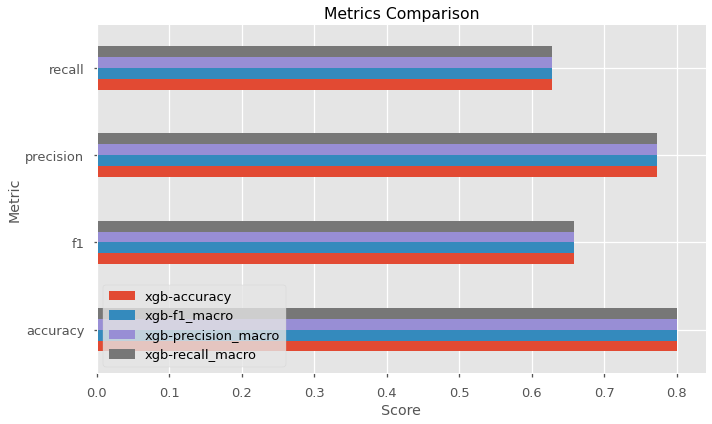

,model_label,best_params,accuracy,f1,precision,recall
0,xgb-accuracy,"{'learning_rate': 0.1, 'max_depth': 9}",0.8,0.657927,0.772328,0.627689
1,xgb-f1_macro,"{'learning_rate': 0.1, 'max_depth': 9}",0.8,0.657927,0.772328,0.627689
2,xgb-precision_macro,"{'learning_rate': 0.1, 'max_depth': 9}",0.8,0.657927,0.772328,0.627689
3,xgb-recall_macro,"{'learning_rate': 0.1, 'max_depth': 9}",0.8,0.657927,0.772328,0.627689


In [24]:
if RUN_GRIDSEARCH:
    xgb_params = {
        'max_depth': [3, 5, 7]
    }

    xgb_df = gridsearch_model(XGBClassifier,
                              'XGB',
                              xgb_params,
                              X_train, X_test, y_train, y_test, 
                              target_names=LABEL_NAMES,
                              scoring_metrics=['accuracy', 'f1', 
                                               'precision', 'recall'],
                              multiclass_default_average='macro')
    
    dump(knn_df, f'models/{XGB_FNAME}')
    
elif XGB_FNAME in os.listdir('models/'):
    xgb_df = load(f'models/{XGB_FNAME}')
    show_metrics_for_df(xgb_df,
                        XGBClassifier,
                        X_train,
                        X_test,
                        y_train,
                        y_test,
                        target_names=LABEL_NAMES)
    
plot_comparisons(xgb_df)
xgb_df

The XGB models are tending to prioritize over-guessing the most common target variable - `functional`.

# Class Imbalance: SMOTE-NC
There are certainly some decent results, but a more balanced training set might help the models predict the minority classes.

- **SMOTENC** is a version of *SMOTE* which can handle one-hot-encoded columns by indicating which columns to treat as categorical.
- It will then create new data points (synthetically) to train on with hopes to get better modeling results.

In [25]:
# Loading columns from processing notebook.
categorical_columns = load('processed_data/cat_feature_names.jobjib')
numerical_columns = load('processed_data/num_feature_names.jobjib')

print('Num:', len(numerical_columns),' Cat:', len(categorical_columns))

Num: 57  Cat: 80


In [26]:
# Get column indexes which are categorical.
cat_col_idxs = np.array([list(X_train.columns).index(c) 
                         for c in categorical_columns])

# Use SMOTENC for continuous and categorical columns.
smote = SMOTENC(random_state=RANDOM_STATE, 
                categorical_features=cat_col_idxs)
smote

SMOTENC(categorical_features=array([ 57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136]),
        random_state=51)

In [27]:
##################################
# This cell takes ~3 min to run. #
##################################

# Synthesize training data to redistribute target classes.
print(headerize('Original Class Distribution'))
print(y_train.value_counts(normalize=True))

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(headerize('Resampled Distribution'))
print(pd.Series(y_train_res).value_counts(normalize=True))

********************************************************************************
*                         Original Class Distribution                          *
********************************************************************************
0    0.543075
2    0.384242
1    0.072682
Name: status_group, dtype: float64
********************************************************************************
*                            Resampled Distribution                            *
********************************************************************************
2    0.333333
1    0.333333
0    0.333333
Name: status_group, dtype: float64


## Fit re-sampled data.

********************************************************************************
*                                     rfc                                      *
********************************************************************************
********************************************************************************
*                                     knn                                      *
********************************************************************************
********************************************************************************
*                                     xgb                                      *
********************************************************************************


,Label,Timestamp,Elapsed Time (sec)
0,Start,2021-02-20 10:53:17.195549,0.000000
1,rfc,2021-02-20 10:53:44.228368,27.032819
2,knn,2021-02-20 10:53:44.250370,27.054821
3,xgb,2021-02-20 10:56:22.331486,185.135937


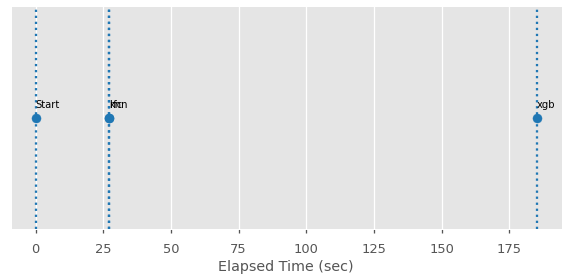

[(RandomForestClassifier(bootstrap=False, min_samples_leaf=3), 'rfc'),
 (KNeighborsClassifier(n_neighbors=3), 'knn'),
 (XGBClassifier(max_depth=9, objective='multi:softprob'), 'xgb')]

In [28]:
##################################
# This cell takes ~3 min to run. #
##################################

# Get best accuracy model-params for each model type.
best_params_df_lst = [
    (RandomForestClassifier, forest_df, 'rfc'),
    (KNeighborsClassifier, knn_df, 'knn'),
    (XGBClassifier, xgb_df, 'xgb')
]

# Instantiate each model with its best accuracy params.
watch = Stopwatch()

models = []
for model, df, name in best_params_df_lst:
    params = df.iloc[0]['best_params']  # accuracy
    
    # Fit with synthesized data.
    m = model(**params).fit(X_train_res, y_train_res)
    models.append((m, name))
    
    print(headerize(name))
    watch.lap(label=name)
    
watch.stop()
watch.display_laps(show_stop=False)

models

********************************************************************************
*                          rfc Classification Report                           *
********************************************************************************
                         precision    recall  f1-score   support

             functional       0.83      0.81      0.82      8065
functional needs repair       0.34      0.58      0.43      1079
         non functional       0.84      0.76      0.80      5706

               accuracy                           0.78     14850
              macro avg       0.67      0.72      0.68     14850
           weighted avg       0.80      0.78      0.78     14850



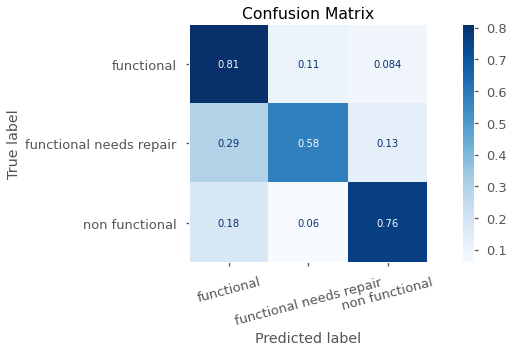

********************************************************************************
*                          knn Classification Report                           *
********************************************************************************
                         precision    recall  f1-score   support

             functional       0.80      0.78      0.79      8065
functional needs repair       0.33      0.46      0.38      1079
         non functional       0.77      0.75      0.76      5706

               accuracy                           0.74     14850
              macro avg       0.63      0.66      0.64     14850
           weighted avg       0.75      0.74      0.75     14850



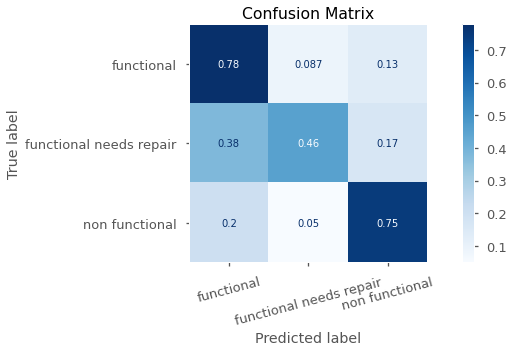

********************************************************************************
*                          xgb Classification Report                           *
********************************************************************************
                         precision    recall  f1-score   support

             functional       0.82      0.77      0.80      8065
functional needs repair       0.29      0.62      0.39      1079
         non functional       0.84      0.73      0.78      5706

               accuracy                           0.74     14850
              macro avg       0.65      0.71      0.66     14850
           weighted avg       0.79      0.74      0.76     14850



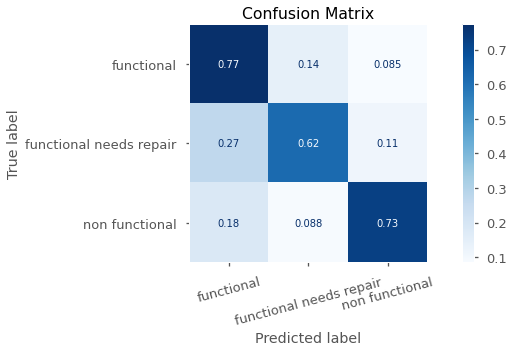

In [29]:
# Evaluate performance.
for model, name in models:
    show_metrics(model, X_test, y_test, 
                 label=name,
                 target_names=LABEL_NAMES)

In some ways, these models are performing much better than with the unbalanced training data.
- They are predicting the minority class *much* more accurately.
- The f1-macro score has increased.

However, their accuracy has diminished due in large part to the number of the majority class (*functional*) which are being mislabeled.

***

Finally, I'm going to try an ensemble with these three classifiers with the SMOTE data to improve the final predictions.

# Creating an Ensemble

In [30]:
# Select what metric to use for the optimized models.
model_optimization_dct = {
    'accuracy': 0,
    'f1_macro': 1,
    'precision_macro': 2,
    'recall_macro': 3
}

# Selecting metric.
OPTIMIZATION_SELECTION = model_optimization_dct['accuracy']
OPTIMIZATION_SELECTION

0

In [31]:
# Our `models` list has models which have already been fit.
unfit_models = []
for clf, df, name in best_params_df_lst:
    params = df.iloc[OPTIMIZATION_SELECTION]['best_params']
    unfit_models.append((name, clf(**params)))
unfit_models

[('rfc', RandomForestClassifier(bootstrap=False, min_samples_leaf=3)),
 ('knn', KNeighborsClassifier(n_neighbors=3)),
 ('xgb', XGBClassifier(max_depth=9))]

## Train Separately on Resampled Data and Original Data

********************************************************************************
*                                   Original                                   *
********************************************************************************
********************************************************************************
*           Stacking Classifier: Original Data Classification Report           *
********************************************************************************
                         precision    recall  f1-score   support

             functional       0.80      0.91      0.85      8065
functional needs repair       0.64      0.30      0.40      1079
         non functional       0.85      0.77      0.81      5706

               accuracy                           0.81     14850
              macro avg       0.76      0.66      0.69     14850
           weighted avg       0.81      0.81      0.80     14850



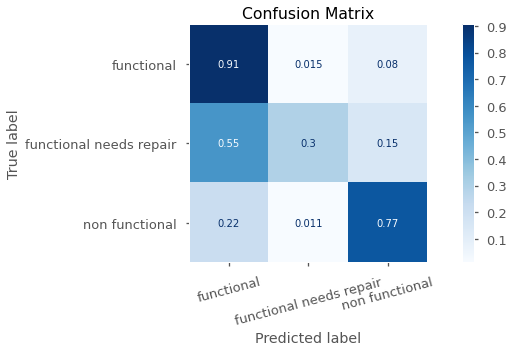

********************************************************************************
*                                  Resampled                                   *
********************************************************************************
********************************************************************************
*          Stacking Classifier: Resampled Data Classification Report           *
********************************************************************************
                         precision    recall  f1-score   support

             functional       0.83      0.81      0.82      8065
functional needs repair       0.37      0.49      0.42      1079
         non functional       0.82      0.79      0.80      5706

               accuracy                           0.78     14850
              macro avg       0.67      0.70      0.68     14850
           weighted avg       0.79      0.78      0.78     14850



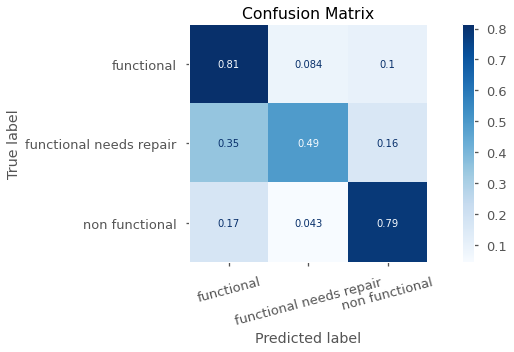

,Label,Timestamp,Elapsed Time (min)
0,Start,2021-02-20 10:57:13.630551,0.00
1,Original,2021-02-20 11:07:55.095258,10.69
2,Resampled,2021-02-20 11:27:19.478350,30.10


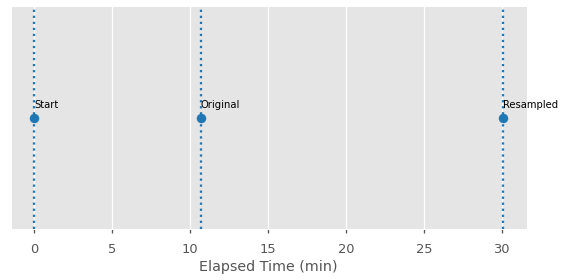

In [32]:
###################################
# This cell takes ~30 min to run. #
###################################

data = [
    (X_train, y_train, 'Original'),
    (X_train_res, y_train_res, 'Resampled')
]

clf_dct = {}

watch = Stopwatch()
for X, y, label in data:
    print(headerize(label))
    stack_clf = StackingClassifier(estimators=unfit_models)
    stack_clf.fit(X, y)

    show_metrics(stack_clf,
                 X_test, 
                 y_test, 
                 label=f'Stacking Classifier: {label} Data',
                 target_names=LABEL_NAMES)
    clf_dct[label] = stack_clf
    watch.lap(label=label)
    
watch.display_laps(minutes_elapsed=True)

In [33]:
clf_dct

{'Original': StackingClassifier(estimators=[('rfc',
                                 RandomForestClassifier(bootstrap=False,
                                                        min_samples_leaf=3)),
                                ('knn', KNeighborsClassifier(n_neighbors=3)),
                                ('xgb', XGBClassifier(max_depth=9))]),
 'Resampled': StackingClassifier(estimators=[('rfc',
                                 RandomForestClassifier(bootstrap=False,
                                                        min_samples_leaf=3)),
                                ('knn', KNeighborsClassifier(n_neighbors=3)),
                                ('xgb', XGBClassifier(max_depth=9))])}

These are two very interesting models.
***
**Original Training Data Model**
- On one hand, we have a model which has a higher overall accuracy (0.81).
- **0.9 recall** for functional water pumps, **0.77 recall** for non-functional pumps.
- The drawback is that more functional needs repair pumps are mislabeled than labeled correctly.

**Resampled Training Data Model**
- The first point to note is the 
- The accuracy is lower (**0.78**), but non functional recall is improved slightly (from 0.77 to **0.79**)
- This model would be good if you especially wanted to try and catch a water pump before it became non functional if it were cheaper to repair it.improvement in the minority class functional needs repair.

# REAL_TEST predictions

In [34]:
X_test_real = REAL_TEST.reset_index(drop=True)
X_test_real

,amount_tsh,gps_height,longitude,latitude,num_private,population,years_old,tsh_exists,installed_by_DWE,basin_Ruvuma / Southern Coast,subvillage_Majengo,subvillage_Shuleni,subvillage_Madukani,subvillage_Mtakuja,subvillage_Kati,region_Iringa,region_Arusha,region_Tabora,region_Tanga,region_code_10,region_code_15,district_code_4,district_code_3,lga_Bariadi,lga_Siha,lga_Kigoma Rural,lga_Bagamoyo,lga_Pangani,lga_Babati,lga_Lindi Rural,lga_Kasulu,lga_Bunda,funder_Government Of Tanzania,funder_Fini Water,funder_Ministry Of Water,funder_Private Individual,funder_Germany Republi,funder_rare,funder_World Bank,funder_Norad,funder_Hesawa,funder_Lga,funder_Rc Church,funder_Isf,funder_Dwsp,funder_Tcrs,funder_Amref,funder_Dwe,funder_District Council,funder_Adb,funder_Private,funder_Netherlands,funder_Wateraid,funder_Mission,funder_Hifab,funder_Water,funder_Rudep,public_meeting_True,public_meeting_missing,scheme_management_Other,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_WUA,scheme_management_Water Board,scheme_management_Water authority,scheme_management_missing,permit_False,permit_missing,extraction_type_group_afridev,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_india mark iii,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_other,extraction_type_group_other handpump,extraction_type_group_other motorpump,extraction_type_group_rope pump,extraction_type_group_submersible,extraction_type_group_swn 80,extraction_type_group_wind-powered,management_company,management_private operator,management_unknown,management_vwc,management_water authority,management_water board,management_wug,management_group_commercial,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_type_annually,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,altitude_cat_med_altitude
0,-0.131809,1.917381,0.186597,0.556538,-0.052648,0.296047,-0.439584,-0.651262,-0.644278,-0.284459,-0.093367,-0.093976,-0.091763,-0.066646,-0.081784,-0.312521,-0.245016,-0.184202,-0.213146,-0.216121,-0.17772,-0.419918,2.223324,-0.14179,-0.085459,-0.118118,-0.131299,-0.07421,-0.092259,-0.08024,-0.133841,-0.083709,-0.426039,-0.079672,-0.09999,-0.119575,-0.101693,1.328993,-0.154071,-0.113337,-0.197715,-0.085725,-0.075273,-0.072665,-0.11595,-0.102031,-0.084521,-0.090637,-0.11841,-0.088858,-0.071406,-0.090385,-0.075724,-0.071088,-0.087696,-0.098723,-0.073442,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.131809,1.301208,0.394140,0.811457,-0.052648,0.252012,0.343914,-0.651262,1.552125,-0.284459,-0.093367,-0.093976,-0.091763,-0.066646,-0.081784,-0.312521,4.081366,-0.184202,-0.213146,-0.216121,-0.17772,-0.419918,-0.449777,-0.14179,-0.085459,-0.118118,-0.131299,-0.07421,-0.092259,-

In [35]:
y_ids = REAL_TEST.reset_index()[['id']]
y_ids

,id
0,50785
1,51630
2,17168
3,45559
4,49871
...,...
14845,39307
14846,18990
14847,28749
14848,33492


## Random Forest Predictions - Original Data

In [36]:
forest_df

,model_label,best_params,accuracy,f1,precision,recall
0,RFC-accuracy,"{'bootstrap': False, 'criterion': 'gini', 'min...",0.809226,0.674151,0.774674,0.643333
1,RFC-f1_macro,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.807003,0.693925,0.727262,0.674195
2,RFC-precision_macro,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.793939,0.638310,0.778300,0.610401
3,RFC-recall_macro,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.807003,0.693925,0.727262,0.674195


In [37]:
params = forest_df.iloc[0]['best_params']
params['random_state'] = RANDOM_STATE

rfc_final = RandomForestClassifier(**params)
rfc_final.fit(X_train, y_train)
rfc_final

RandomForestClassifier(bootstrap=False, min_samples_leaf=3, random_state=51)

In [38]:
y_ids['RFC'] = rfc_final.predict(X_test_real)
y_ids

,id,RFC
0,50785,2
1,51630,0
2,17168,0
3,45559,2
4,49871,0
...,...,...
14845,39307,2
14846,18990,0
14847,28749,0
14848,33492,0


## Ensemble Predictions

In [39]:
for k in clf_dct.keys():
    y_ids[k] = clf_dct[k].predict(X_test_real)
    
y_ids

,id,RFC,Original,Resampled
0,50785,2,2,2
1,51630,0,0,0
2,17168,0,0,0
3,45559,2,2,2
4,49871,0,0,0
...,...,...,...,...
14845,39307,2,2,2
14846,18990,0,0,0
14847,28749,0,0,0
14848,33492,0,0,0


## Submissions

In [40]:
# Inverse transform the target.
y_ids_inv = y_ids.copy()

y_ids_inv['RFC'] = label_enc.inverse_transform(y_ids['RFC'])
y_ids_inv['Original'] = label_enc.inverse_transform(y_ids['Original'])
y_ids_inv['Resampled'] = label_enc.inverse_transform(y_ids['Resampled'])

y_ids_inv

,id,RFC,Original,Resampled
0,50785,non functional,non functional,non functional
1,51630,functional,functional,functional
2,17168,functional,functional,functional
3,45559,non functional,non functional,non functional
4,49871,functional,functional,functional
...,...,...,...,...
14845,39307,non functional,non functional,non functional
14846,18990,functional,functional,functional
14847,28749,functional,functional,functional
14848,33492,functional,functional,functional


In [41]:
def format_for_competition(dataframe, col):
    """Return a reformatted slice of the dataframe to submit."""
    
    submission = dataframe[['id', col]].copy()
    submission.columns = ['id', 'status_group']
    return submission

In [42]:
rfc_submission = format_for_competition(y_ids_inv, 'RFC')
rfc_submission

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


In [43]:
original_submission = format_for_competition(y_ids_inv, 'Original')
original_submission

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


In [44]:
resampled_submission = format_for_competition(y_ids_inv, 'Resampled')
resampled_submission

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


In [45]:
rfc_submission.to_csv('competition_predictions/rfc.csv', 
                      index=False)
original_submission.to_csv('competition_predictions/original.csv', 
                           index=False)
resampled_submission.to_csv('competition_predictions/resampled.csv', 
                            index=False)

# Results
**Random Forest - Original Sampling**
<img src='./images/rfc_results.png'>
**Ensemble - Original Sampling Method**
<img src='./images/original_sample_results.png'>
**Ensemble - Post-SMOTE-NC Sampling**
<img src='./images/resampled_results.png'>